## Next cell just in case we need to install something...

In [41]:
!pip install spacy wordcloud

  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.2 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.2 MB 1.7 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/12.2 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.2 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.2 MB 1.8 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.2 MB 1.9 MB/s eta 0:00:06
   ------------ --------------------------- 3.7/12.2 MB 2.0 MB/s eta 0:00:05
   ------------- -------------------------- 4.2/12.2 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 5.0/12.2 MB 2.2 MB/s eta 0:00:04
   ----------------

In [2]:
import pandas as pd
import numpy as np
import io
# from google.colab import files
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# UPLOAD & QUICK OVERVIEW

UPLOAD FILES

In [59]:
csv_fname = "C:/Users/tradu/Desktop/CURSOS TECH/CodeOp Data Science/TP final/DATA FINAL/lyrics_ML-main/data/song_lyrics_es_1950_2020.csv"
chunk_size = 20000  # arbitrarily
codes = ['es']

# Read the CSV file in chunks, handling potential errors
# Use 'on_bad_lines' instead of 'error_bad_lines' for pandas versions 1.3.0 and above
chunks = pd.read_csv(csv_fname, chunksize=chunk_size, encoding='utf-8', on_bad_lines='skip')  # or escapechar=None, adjust as needed

# Process each chunk
filtered_chunks = []
for chunk in chunks:
    # Check if 'language' column exists before filtering
    if 'language' in chunk.columns:
        filtered_chunk = chunk[chunk['language'].isin(codes)]
        filtered_chunks.append(filtered_chunk)
    else:
        # Handle the case where 'language' column is missing
        # Print a warning or skip the chunk, depending on your desired behavior
        print("Warning: 'language' column not found in this chunk. Skipping...")
        # Optionally, you can append the entire chunk without filtering:
        # filtered_chunks.append(chunk)

# Combine all filtered chunks into a single DataFrame
df = pd.concat(filtered_chunks)
del filtered_chunks

HEAD, TAIL, SAMPLE & SHAPE

In [4]:
df.head(5)

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,decade
0,Gasolina Remix,rap,Daddy Yankee,2004,47419,"{""Lil Jon"",N.O.R.E.,Pitbull}","Letra de ""Gasolina (Remix)"" ft. N.O.R.E., Lil ...",4171,es,es,es,2000
1,Rompe,rap,Daddy Yankee,2005,18308,{},"[Letra de ""Rompe""]\n\n[Intro]\nYou know\nLos c...",4175,es,es,es,2000
2,We No Speak Americano Remix,rap,Pitbull,2011,3515,{},[Intro - Pitbull]\nThis is worldwide\nEso aqui...,4190,es,es,es,2010
3,Suenos en Realidad,rap,Ozomatli,2011,68,{},Todos que convierten suenos en realidad\nSu lu...,36381,es,es,es,2010
4,Triste Me Pongo,rap,Califas (Mr. Lil One & Shisty),2011,181,{},{Girl Singing Chorus 2X}\nEstoy tan enamorada ...,12570,es,es,es,2010


In [5]:
df.tail()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,decade
275054,Super Hot,rap,Akasha,2022,7,{},"[Letra de ""Super Hot""]\n\n[Intro: Lil Pump]\n(...",7882460,es,es,es,2020
275055,Yo Queria,pop,Joseph Palacios,2022,1,{},Tantas promesas que se apagan hoy\nY no sabemo...,7882547,es,es,es,2020
275056,Perder Control,pop,Evangelia,2022,6,"{""Eleni Foureira""}",[Lyrics from snippet]\n\nMi cora dice no te va...,7882602,es,es,es,2020
275057,Otra Semana,pop,laye,2022,2,{‌laye},[VERSO 1]\nHoy amor tenemos que hablar claro\n...,7882662,es,es,es,2020
275058,Tentación,rock,Imminence,2022,5,{},[Verse 1]\nNo puedo creer que terminé aquí otr...,7882828,es,es,es,2020


In [6]:
#aleatorio
df.sample()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,decade
213911,Historias en el Mar,pop,Accidents,2020,345,{},Ya casi son las seis y faltan unas horas para ...,6021533,es,es,es,2020


In [7]:
df.shape

(275059, 12)

DESCRIBE (Vista rápida del DF)

In [8]:
df.describe()

,year,views,id,decade
count,275059.00,275059.00,275059.00,275059.00
mean,2012.08,1405.82,3969928.64,2007.75
std,10.61,47487.02,2199347.68,11.29
min,1950.00,0.00,4171.00,1950.00
25%,2009.00,20.00,1860786.00,2000.00
50%,2015.00,67.00,4017391.00,2010.00
75%,2019.00,271.00,5815718.00,2010.00
max,2024.00,23351415.00,7882828.00,2020.00


#**1- Limpieza**:
- Entender lo que quieren decir las columnas de mi dataset.
- Chequear si tenemos duplicados y eliminarlos si los hubiera.
- O bien eliminamos los valores nulos o bien los sustituimos por algún otro valor.
- Asegurarnos de que no hay errores.
- Añadir las columnas necesarias.


# COLUMNAS

In [10]:
df.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id',
       'language_cld3', 'language_ft', 'language', 'decade'],
      dtype='object')

In [9]:
df.dtypes

title            object
tag              object
artist           object
year              int64
views             int64
features         object
lyrics           object
id                int64
language_cld3    object
language_ft      object
language         object
decade            int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275059 entries, 0 to 275058
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          275050 non-null  object
 1   tag            275059 non-null  object
 2   artist         275059 non-null  object
 3   year           275059 non-null  int64 
 4   views          275059 non-null  int64 
 5   features       275059 non-null  object
 6   lyrics         275059 non-null  object
 7   id             275059 non-null  int64 
 8   language_cld3  275059 non-null  object
 9   language_ft    275059 non-null  object
 10  language       275059 non-null  object
 11  decade         275059 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 25.2+ MB


### Borro los 9 nulos de la columna 'title'

In [60]:
#Nulos title, los descarto (sólo 9)
df = df[df['title'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275050 entries, 0 to 275058
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          275050 non-null  object
 1   tag            275050 non-null  object
 2   artist         275050 non-null  object
 3   year           275050 non-null  int64 
 4   views          275050 non-null  int64 
 5   features       275050 non-null  object
 6   lyrics         275050 non-null  object
 7   id             275050 non-null  int64 
 8   language_cld3  275050 non-null  object
 9   language_ft    275050 non-null  object
 10  language       275050 non-null  object
 11  decade         275050 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 27.3+ MB


In [61]:
#Eliminar las columnas
df = df.drop(['language_cld3','language_ft'], axis=1)
df.head()

,title,tag,artist,year,views,features,lyrics,id,language,decade
0,Gasolina Remix,rap,Daddy Yankee,2004,47419,"{""Lil Jon"",N.O.R.E.,Pitbull}","Letra de ""Gasolina (Remix)"" ft. N.O.R.E., Lil ...",4171,es,2000
1,Rompe,rap,Daddy Yankee,2005,18308,{},"[Letra de ""Rompe""]\n\n[Intro]\nYou know\nLos c...",4175,es,2000
2,We No Speak Americano Remix,rap,Pitbull,2011,3515,{},[Intro - Pitbull]\nThis is worldwide\nEso aqui...,4190,es,2010
3,Suenos en Realidad,rap,Ozomatli,2011,68,{},Todos que convierten suenos en realidad\nSu lu...,36381,es,2010
4,Triste Me Pongo,rap,Califas (Mr. Lil One & Shisty),2011,181,{},{Girl Singing Chorus 2X}\nEstoy tan enamorada ...,12570,es,2010


In [14]:
df_rap = df[df['tag'] == 'rap']
df_rap.shape

(66510, 10)

In [15]:
df['tag'].unique()

array(['rap', 'pop', 'rock', 'misc', 'country', 'rb'], dtype=object)

In [16]:
df_country = df[df['tag'] == 'country']
df_country.shape

(2362, 10)

In [17]:
df_rb= df[df['tag'] == 'rb']
df_rb.shape


(6461, 10)

In [18]:
df_rb.head(10)

,title,tag,artist,year,views,features,lyrics,id,language,decade
1665,Dondé Estoy,rb,JMSN,2013,1443,{},¿Merezco lo bueno que viene a mí?\nCuando te e...,256688,es,2010
1982,No Me Ames Tropical Remix,rb,Jennifer Lopez,1999,1343,"{""Marc Anthony""}",[Verse 1]\nDime porque lloras\nDe felicidad\nY...,305734,es,1990
2414,Eres Mía,rb,Romeo Santos,2014,150994,{},"[Letra de ""Eres Mía""]\n\n[Verso 1]\nYa me han ...",371117,es,2010
2701,Contigo Quiero Amores,rb,Arcngel,2013,3277,{Arcángel},"[Letra de ""Contigo Quiero Amores""]\n\n[Intro: ...",399009,es,2010
3509,Miles De Mujeres,rb,lvaro Daz,2014,30924,"{""Álvaro Díaz"",Randy}","[Letra de ""Miles De Mujeres"" ft. Randy]\n\n[In...",535475,es,2010
3595,Las noches son mas frias,rb,Tommy Omeany,2014,62,{},Semi Coro\n\nLas noches son mas frias en mi ca...,573586,es,2010
3605,Happy Hours,rb,Yung Beef,2014,168,"{""La Favi""}","[Letra de ""Happy Hours"" ft. La Favi]\n\n[Estri...",578741,es,2010
3621,Hasta el techo,rb,ChocQuibTown,2011,442,{},Oye..\nCómo..\nOye..\n\n(Goya Verse Pt1)\nMis ...,584646,es,2010
3650,Quiero Que Sepas Que,rb,Axel MP,2014,198,{Xrchy},[Intro]\nNunca Había sentido esto lo que provo...,594227,es,2010
3859,El Taxi,rb,Pitbull,2016,59007,"{Sensato,""Osmani Garcia"",""Dayami La Musa""}","[Letra de ""El Taxi""]\n\n[Intro: Osamani Garcia...",691366,es,2010


In [19]:
df_country.head(10)

,title,tag,artist,year,views,features,lyrics,id,language,decade
1090,El Rey,country,George Strait,2009,835,{},"[Verse 1]\nYo se bien que estoy afuera, pero e...",192244,es,2000
1091,Guadalajara,country,Elvis Presley,1963,504,{},"[Intro]\nGuadalajara, Guadalajara\nGuadalajara...",197315,es,1960
1999,Negro Y Azul: The Ballad of Heisenberg,country,Los Cuates de Sinaloa,2008,22573,{},"[Letra de ""Negro Y Azul: The Ballad of Heisenb...",307466,es,2000
4122,El Güilo Rivera,country,Chalino Snchez,1992,1191,"{""Chalino Sánchez""}","[Letra de ""El Güilo Rivera""]\n\n[Verso 1]\nCon...",742910,es,1990
6161,Cerebro De Caca,country,Amandititita,2009,181,{},No me amedrentas con tu alharaca\nSé que provi...,781142,es,2000
6904,Alma Enamorada,country,Los Alegres de Tern,1976,342,"{""Los Alegres de Terán""}",[Verso 1]\nTengo el alma enamorada nomas de pe...,790048,es,1970
10866,Maria Elena,country,Marty Robbins,1966,216,{},"[Letra de ""Maria Elena""]\n\n[Verso 1]\nTuyo es...",864100,es,1960
11651,Los Dos Amigos,country,Los Cadetes De Linares,1975,9070,{},Estos eran dos amigos\nQue venían de Mapimí\nQ...,878749,es,1970
11761,El Siete Mares,country,Jos Alfredo Jimnez,1962,985,"{""José Alfredo Jiménez""}","[Letra de ""El Siete Mares""]\n\n[Verso 1]\nSoy ...",880877,es,1960
11939,Los Sinaloenses,country,Chalino Snchez,2001,2219,"{""Chalino Sánchez""}","Estado de Sinaloa, como as agarrado fama\nSon ...",884760,es,2000


### REORDENAR COLUMNAS

In [62]:
df_reordered = df[['id','tag', 'title', 'artist', 'features', 'year','decade','language','views', 'lyrics']]

## Duplicados? (no)

In [63]:
df_reordered.duplicated().sum()

np.int64(0)

# Hay lyrics duplicadas (nota mental: ver después)

In [33]:
df_reordered["lyrics"].duplicated().sum()

np.int64(3305)

In [ ]:
from collections import Counter
df_duplicated= df_reordered[df_reordered["lyrics"].duplicated()].sort_values(by= "lyrics")
df_duplicated.head(15)
#Counter(df_duplicated["lyrics"].values)

In [ ]:
from collections import Counter
df_duplicated= df_reordered[df_reordered["title"].duplicated()]
df_duplicated.head(15)
Counter(df_duplicated["title"].values)

In [ ]:
df_duplicated[df_duplicated['title']== 'Ojos']

In [35]:
df_reordered['tag'].unique()

array(['rap', 'pop', 'rock', 'misc', 'country', 'rb'], dtype=object)

In [64]:
df_misc= df_reordered[df_reordered['tag'] == 'misc']
df_misc.shape

(3940, 10)

In [65]:
df_misc.head(10)
#Esta categoría está llena de escritos y poemas. poetas = [Pablo Neruda,Federico Garca Lorca,Octavio Paz, Gabriel Garca Mrquez, Gabriel Garca Marquez, Rubn Daro, Ruben Dario, Jorge Luis Borges,Julia de Burgos,Csar Vallejo, Cesar Vallejo,
#College Board, Morejn Nancy, Morejon Nancy, Heberto Padilla], etc				]

,id,tag,title,artist,features,year,decade,language,views,lyrics
151,106818,misc,El cheroke de la muerte,Los originales de san juan,{},2013,2010,es,20,Un 23 de Diciembre del año 2012 un lunes por l...
152,98783,misc,El ahogado más hermoso del mundo,Gabriel Garca Mrquez,"{""Gabriel García Márquez""}",1968,1960,es,9504,Los primeros niños que vieron el promontorio o...
159,100082,misc,Mentiras,Los Amigos Invisibles,{},2009,2000,es,2036,Esas son puras mentiras\nEsa noche yo no andab...
160,100915,misc,Esperando La Cita,Marius L.,{Safio},2012,2010,es,263,"[Intro: Safio]\n""Aquí una vez más,\nSafio, jun..."
182,110529,misc,Algunas Bestias,Pablo Neruda,{},2013,2010,es,130,Era el crepúsculo de la iguana.\nDesde la arco...
183,110619,misc,Piedra de Sol,Octavio Paz,{},2013,2010,es,1801,La treizième revient...c’est encor la première...
198,116921,misc,La Muerta,Pablo Neruda,{},2013,2010,es,50,"Si de pronto no existes,\nsi de pronto no vive..."
199,116947,misc,Oda al Tomate,Pablo Neruda,{},2013,2010,es,3327,"La calle\nse llenó de tomates,\nmediodia,\nver..."
206,119901,misc,The Unfaithful Housewife,Federico Garca Lorca,"{""Federico García Lorca"",""Conor O\\'Callaghan ...",2013,2010,es,1366,Then I led her to the river\ncertain she was s...
208,120467,misc,Poesia,Pablo Neruda,{},2013,2010,es,221,Y fue a esa edad... Llegó la poesía\na buscarm...


In [66]:
df_ES = df_reordered[df_reordered['tag'] != 'misc']
df_ES.shape

(271110, 10)

In [67]:
'misc' in df_ES['tag'].unique()

False

In [68]:
df_ES.to_csv('df_ES.csv',sep=',', index=False, encoding='utf-8')

# Funciones de apoyo

In [ ]:
#Para dividir la base de datos original, porque es muy grande
def load_data(
        csv_path: str,
        languages: list = None,
        chunk_size: int = 20000
        ) -> pd.DataFrame:
    # dafault is Spanish
    if languages is None:
        languages = ['es']
    # Read the CSV file in chunks
    chunks = pd.read_csv(csv_path, chunksize=chunk_size, encoding='utf-8')
    # Process each chunk
    filtered_chunks = []
    for chunk in chunks:
        filtered_chunk = chunk[chunk['language'].isin(languages)]
        filtered_chunks.append(filtered_chunk)
    # Combine all filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks)
    return filtered_df

In [69]:
#Limpieza de lyrics
import re
import string

es_punct = string.punctuation + "¡¿"

def clean_lyrics(letra):
    cleaned = ''
    for text in letra.split('\n')[1:]:   # remove the first line
        if text == '':
            continue
        text = re.sub(r'\[.+?\]', ' ', text) # remove whatever is between brackets
        text = re.sub(r'\((.+?)\)', r'\1', text) # keep what is between parentheses
        text = re.sub(r'\"(.+?)\"', r'\1', text) # keep what is between quotes
        text = re.sub('[\s]+', ' ', text) # spaces
        text = text.strip() # remove leading and trailing spaces
        text = text.lower() # lowercase
        text = re.sub(rf'(?<!\w)-|-(?!\w)|[{re.escape(es_punct)}]', '', text)  # remove punctuation except '-' within words
        cleaned += text + ' '
    cleaned = re.sub(r'\s+', ' ', cleaned) # remove multiple spaces
    cleaned = cleaned.strip() # remove leading and trailing spaces
    return cleaned

# **2- EDA:**
- Graficar y extraer conclusiones como hicimos en el proyecto anterior.
- Plantearme una pregunta →
- Ejemplo: ¿Cuánto va a crecer el empleo en Europa los próximos cinco años? →
Valor continuo, por tanto se trata de una regresión.
- Ejemplo: Si defino varias categorías, como por ejemplo: si sube de un 5% como
un gran crecimiento, entre 1 y 5 % un crecimiento moderado, entre 0 y 1% un
crecimiento bajo y menor que 0% un crecimiento decreciente. ¿A qué categoría
pertenece cada país? → Clasificación porque me pregunto una categoría
- Ejemplo: Que productos de mi catálogo son más similares a los gustos de un
cliente? → Clustering, agruparíamos los productos con características más
similares.

##Import relevant libraries

In [45]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.9 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.9 MB 2.6 MB/s eta 0:00:05
     ----- ---------------------------------- 1.8/12.9 MB 3.2 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.9 MB 3.2 MB/s eta 0:00:04
     -------- ------------------------------- 2.9/12.9 MB 2.9 MB/s eta 0:00:04
     ------------ --------------------------- 3.9/12.9 MB 3.3 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.9 MB 3.4 MB/s eta 0:00:03
     ----------------- ---------------------- 5.5/12.9 MB 3.5 MB/s eta 0:00:03
     -------------------- ------------------- 6.6/12.9 MB 3.6 MB/s eta 0:00:02
     --------------------- ------------------ 7.1/12.9 MB 3.5 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.9 MB 3.5 MB/s eta 0:00:02
     -------------------------- ------------- 8.7/12.9 MB 3

In [46]:
import re
import pandas as pd
import numpy as np
import spacy
import swifter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the Spanish language model
nlp = spacy.load("es_core_news_sm")

## FORMATO TEXTO

## Limpieza y normalización de las letras

In [70]:
data_soure = 'df_ES.csv'

df = pd.read_csv(data_soure, encoding='utf8')
df['cleaned_lyrics'] = df['lyrics'].swifter.apply(clean_lyrics)
df.columns

Pandas Apply: 100%|██████████| 271110/271110 [02:55<00:00, 1546.47it/s]


Index(['id', 'tag', 'title', 'artist', 'features', 'year', 'decade',
       'language', 'views', 'lyrics', 'cleaned_lyrics'],
      dtype='object')

In [ ]:
# Eliminar las filas con 'Genius Traducciones al Espaol' en la columna 'artist'
# Esto es necesario porque son canciones en inglés traducidas al español
# y no son relevantes para el análisis de letras en español
df = df[df['artist'] != 'Genius Traducciones al Espaol']

## Cantidad de canciones por década

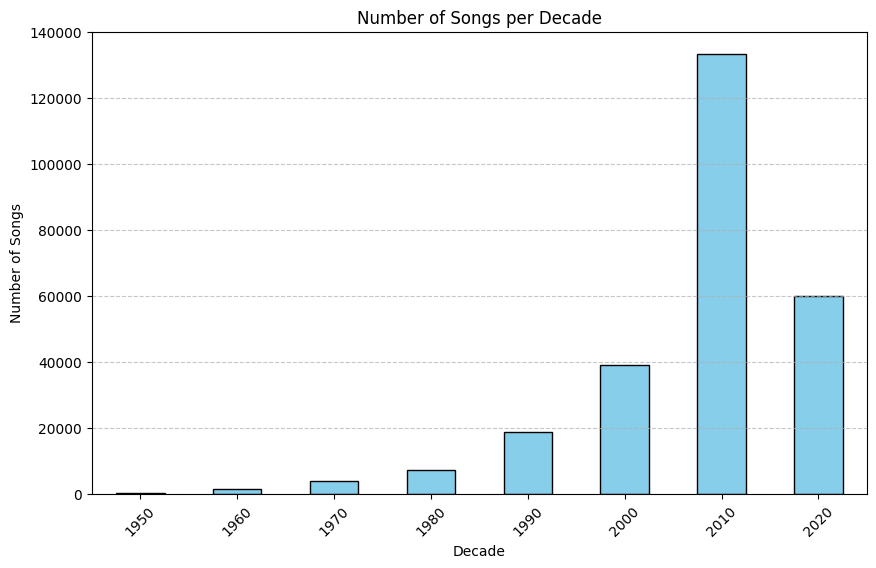

In [82]:
songs_per_decade = df.groupby('decade').size()

# Plot the number of songs per decade
plt.figure(figsize=(10, 6))
songs_per_decade.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per Decade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Cantidad de canciones por década y por género

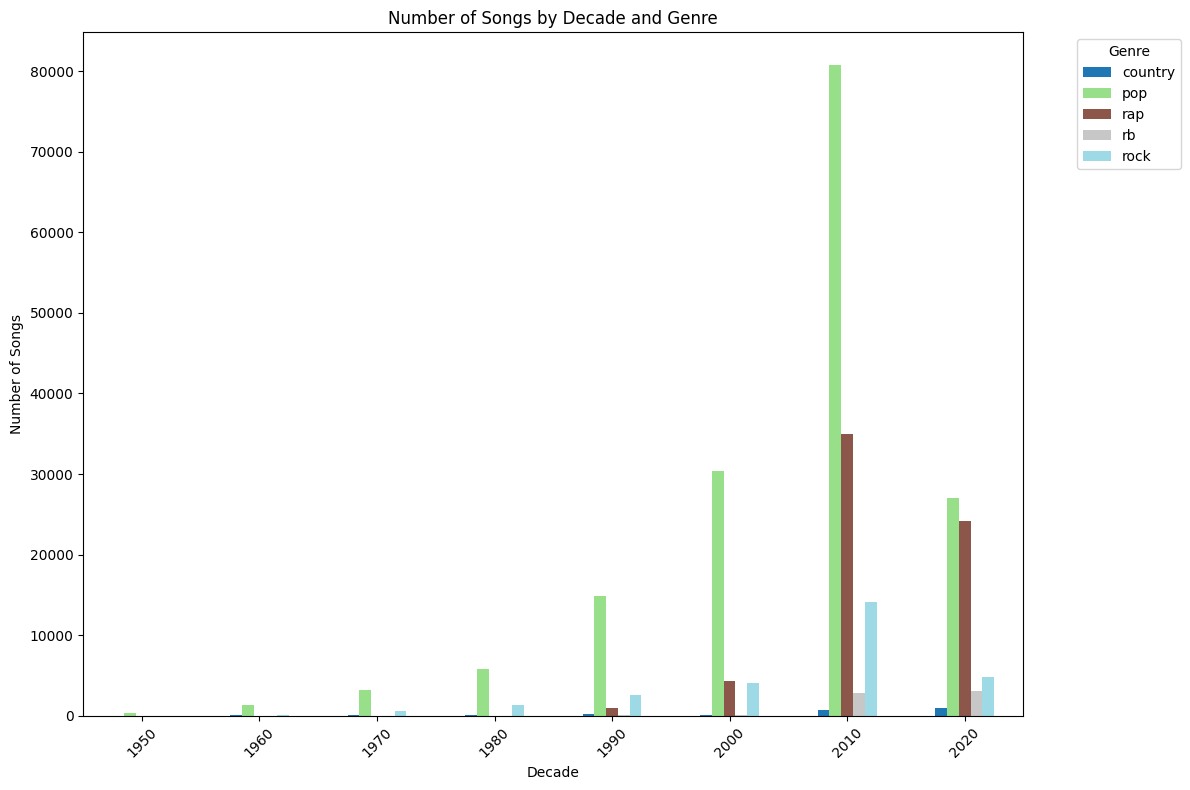

In [83]:
# Group the data by decade and genre (tag) and count the number of songs
songs_by_decade_genre = df.groupby(['decade', 'tag']).size().unstack()

# Plot the grouped bar chart
songs_by_decade_genre.plot(kind='bar', figsize=(12, 8), stacked=False, colormap='tab20')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Decade and Genre')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

### Cantidad de views por género (popularidad)

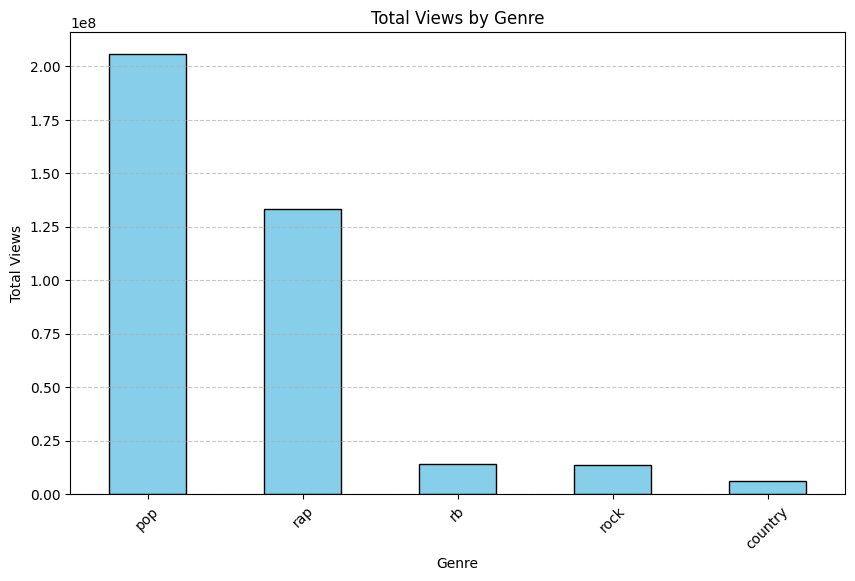

In [86]:
# Group the data by genre (tag) and sum the views
views_by_genre = df.groupby('tag')['views'].sum()

# Plot the chart
plt.figure(figsize=(10, 6))
views_by_genre.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Total Views')
plt.title('Total Views by Genre')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [87]:
# Sort the dataframe by views in descending order and select the top 20 rows
top_20_songs = df.sort_values(by='views', ascending=False).head(20)

# Display the artist and title of the top 20 songs
top_20_songs[['artist', 'title', 'views']]

,artist,title,views
108806,Luis Fonsi & Daddy Yankee,Despacito Remix,23351415
107127,Luis Fonsi,Despacito,3723797
117028,"Nio Garca, Casper Mgico & Bad Bunny",Te Boté Remix,2185301
103099,Rodrigo Amarante,Tuyo,1849810
117512,Bad Bunny,Amorfoda,1662622
116177,Paulo Londra,Nena Maldición,1590724
109647,J Balvin & Willy William,Mi Gente,1558734
109602,Bad Bunny,Tú No Metes Cabra,1313427
112686,Duki,She Don’t Give a Fo,1238168
237707,Bad Bunny,Yonaguni,1183755


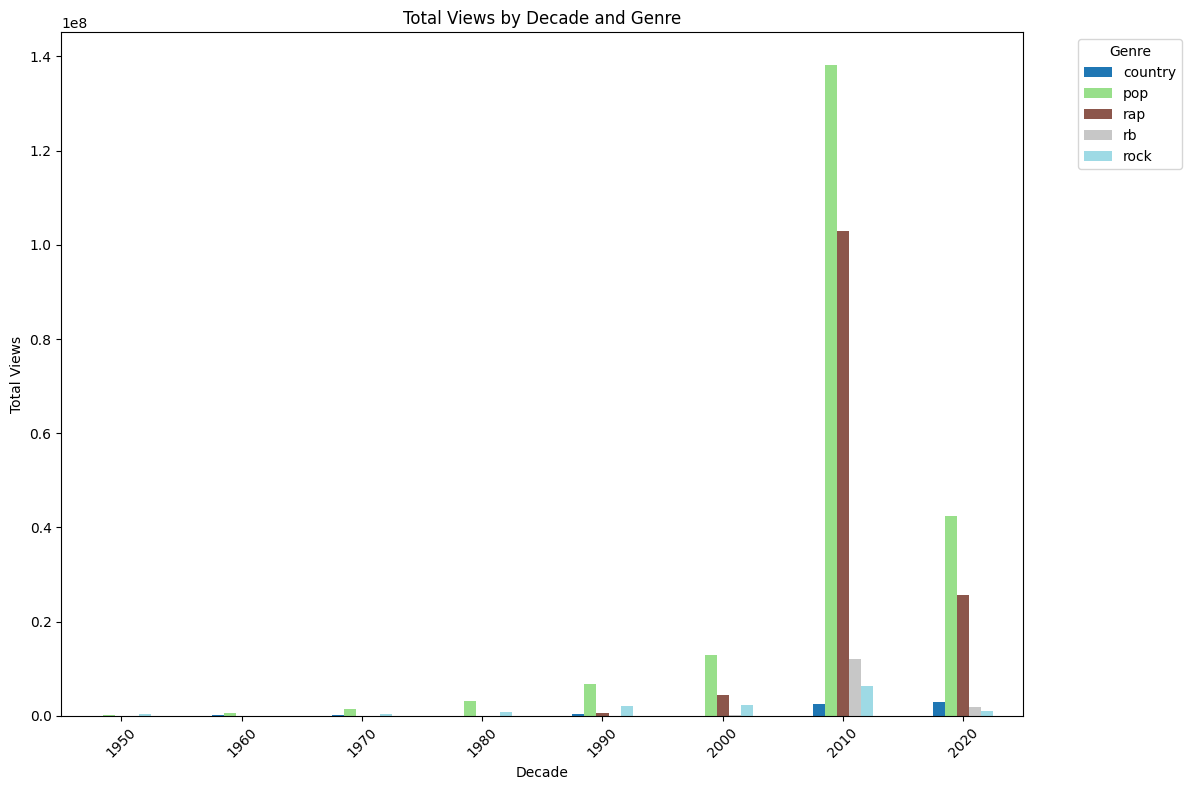

In [88]:
# Group the data by decade and genre (tag) and sum the views
views_by_decade_genre = df.groupby(['decade', 'tag'])['views'].sum().unstack()

# Plot the grouped bar chart
views_by_decade_genre.plot(kind='bar', figsize=(12, 8), stacked=False, colormap='tab20')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Total Views')
plt.title('Total Views by Decade and Genre')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [89]:
# Filter data for the desired decades and genres
filtered_data = top_songs_by_genre_decade[
    (top_songs_by_genre_decade['decade'].between(1990, 2020)) &
    (top_songs_by_genre_decade['tag'].isin(['rap', 'pop']))
]

# Group by decade and genre, and display the top 10 songs with views
for (decade, genre), group in filtered_data.groupby(['decade', 'tag']):
    print(f"Decade: {decade}, Genre: {genre}")
    top_10 = group.nlargest(10, 'views')[['title', 'artist', 'views']]
    print(top_10.to_string(index=False))
    print("\n")

Decade: 1990, Genre: pop
                       title            artist  views
                Como La Flor            Selena 221725
                    Macarena        Los del Ro 201837
             No Me Queda Más            Selena 120997
                 Amigo Amigo    Roberto Carlos  99317
              Amor Prohibido            Selena  97324
                  Suavemente      Elvis Crespo  75992
                  Si Una Vez            Selena  70484
 Mi Historia Entre Tus Dedos Gianluca Grignani  55607
        Canción Del Mariachi         Los Lobos  43404
El Chico Del Apartamento 512            Selena  42693


Decade: 1990, Genre: rap
                                          title                        artist  views
                         Mis Ojos Lloran Por Ti                  Big Boy [PR]  66478
                                    Clandestino                     Manu Chao  64867
                         Los Caminos de la Vida            La Tropa Vallenata  30204
              

In [90]:
# Group the data by decade and genre, then sort by views and select the top 10 songs for each group
top_songs_by_genre_decade = (
    df.groupby(['decade', 'tag'])
    .apply(lambda group: group.nlargest(10, 'views'))
    .reset_index(drop=True)
)

# Create a pivot table for visualization
pivot_table = top_songs_by_genre_decade.pivot_table(
    index=['decade', 'tag'],
    values=['title', 'artist', 'views'],
    aggfunc=lambda x: list(x)
)

# Display the top 10 songs for each genre in each decade
for (decade, genre), data in pivot_table.iterrows():
    print(f"Decade: {decade}, Genre: {genre}")
    for title, artist, views in zip(data['title'], data['artist'], data['views']):
        print(f"  {title} by {artist} - {views} views")
    print("\n")

Decade: 1950, Genre: country
  Ella by Jos Alfredo Jimnez - 13571 views
  Caminos de Guanajuato by Jos Alfredo Jimnez - 6444 views
  El Jinete by Jos Alfredo Jimnez - 2329 views
  Tu Recuerdo y Yo by Jos Alfredo Jimnez - 1528 views
  Serenata Huasteca by Jos Alfredo Jimnez - 1213 views
  Cuando El Destino by Jos Alfredo Jimnez - 858 views
  Guitarras de Media Noche by Jos Alfredo Jimnez - 695 views
  Cuatro Caminos by Jos Alfredo Jimnez - 517 views
  Amor Del Alma by Jos Alfredo Jimnez - 357 views
  Virgencita de Zapopan by Jos Alfredo Jimnez - 205 views


Decade: 1950, Genre: pop
  El Ratón Vaquero by Cri-Cri - 58862 views
  Nuestro Juramento by Julio Jaramillo - 6094 views
  Cochinitos Dormilones by Cri-Cri - 5357 views
  El Chorrito by Cri-Cri - 4703 views
  Aquellos Ojos Verdes by Nat "King" Cole - 4175 views
  Angelitos Negros by Eartha Kitt - 3313 views
  Piel Canela by Eydie Gorm y Los Panchos - 3026 views
  La Patita by Cri-Cri - 2914 views
  La Muñeca Fea by Cri-Cri - 2852 vie

C:\Users\tradu\AppData\Local\Temp\ipykernel_16684\1337410476.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.nlargest(10, 'views'))


# **3- Pre-procesado.**
- Convertir las columnas categóricas en números
- OneHotEncoder, LabelEncoder, OrdinalEncoder…
- Comprobar si mis columnas numéricas siguen una distribución gaussiana → shapiro
- Si siguen una distribución gaussiana → StandardScaler
- Si no siguen distribución gaussiana:
- Si tiene outliers: RobustScaler
- Si no tiene outliers → Normalización (MinMaxScaler u otras opciones).
- También tenemos columnas con texto:
- Tokenizarlas → Separar mi texto por palabras.
- Limpiar el texto → eliminar los signos de puntuación, pasar todo el texto a
minúsculas.
- Para reducir la dimensionalidad del dataset teníamos dos opciones:
- Stemming → usa la raíz lingüística (patrón de letras por las que empieza
la palabra). (Ej: zombi → zombie, zombies; hav → have, having). Este
método lo usaremos cuando tengamos problemas sencillos de resolver o
cuando prioricemos la sintaxis (gramática) sobre la semántica (el
significado).
- Lemmatization → usa la raíz semántica (Ej: good → good, better, best;
have → have, having, had, has…; zombie → zombie, zombies). Lo
usaremos cuando queramos priorizar la semántica sobre la sintaxis.


## Lemmatization

In [ ]:
def lemmatize_text(text):
    """
    Lemmatize the input text using spaCy's Spanish language model,
    excluding stopwords.
    """
    doc = nlp(text)
    return " ".join([
        token.lemma_ for token in doc
        if not token.is_punct and not token.is_space and not token.is_stop
    ])

# df_short = df.sample(5000, random_state=42)  # Sample 1000 rows for faster processing
df_short = df

# Apply lemmatization using swifter
df_short['lemmatized_lyrics'] = df_short['cleaned_lyrics'].swifter.apply(lemmatize_text)

df_short.to_csv('/mnt/c/Users/rmessina/Eli/data/song_lyrics_es_1950_2020_lemmatized_lyrics.csv', index=False, encoding='utf-8')

## Conteo de Lemmas por década/ Count unique lemmas per decade

In [ ]:
# Group by decade and calculate the average number of unique words per song
def average_unique_words_per_decade(a_df):
    avg_unique_words_per_decade = {}
    for decade, group in a_df.groupby('decade'):
        unique_word_counts = group['lemmatized_lyrics'].apply(lambda x: len(set(x.split())))
        avg_unique_words_per_decade[decade] = unique_word_counts.mean()
    return avg_unique_words_per_decade

# Get the unique word counts
avg_words_per_decade = average_unique_words_per_decade(df_short)

# Plot the number of unique words per decade
plt.figure(figsize=(10, 6))
plt.bar(avg_words_per_decade.keys(), avg_words_per_decade.values(), color='skyblue', edgecolor='black')
plt.xlabel('Decade')
plt.ylabel('Average number of Unique Words')
plt.title('Average number of Unique Words per Decade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Top 50 lemmas por década

#### Conteo de sustantivos y verbos

### Uso de onomatopeyas y otras palabras, conteo y listado de las más usadas

### Uso de onomatopeyas y otras palabras vacías: frecuencia por década

### Frecuencia de onomatopeyas y otras por género

### Lemmatization 2, limpieza de onomatopeyas y otras palabras vacías

### Recuento promedio de lemmas por década: Varían los resultados anteriores?

### Word Clouds

In [ ]:
# Generate word clouds for each decade
for decade, group in df_short.groupby('decade'):
    # Concatenate all lyrics for the decade
    all_words = " ".join(group['lemmatized_lyrics'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Decade {decade}")
    plt.show()

# **4- ML**:
- **Clasificación**:
    - Logistic Regression
    - SVM (sklearn → SVC)
    - Decision Trees
    - Random Forests
    - AdaBoost Classifiers (y variantes, como GradientBoosting)
    - Neural networks (perceptrons)
    - NaiveBayes
- **Regresión:**
    - Linear Regression (polynomial)
    - Ridge
    - Lasso
    - SVM (SVR → en sklearn)
    - Neural networks (perceptrons)
    - Decision trees
    - Random Forests
    - AdaBoost Regression (y variantes, como GradientBoosting)
- **Agrupaciones:**
    - K-means
    - DBSCAN
    - Gaussian Mixture Models (GMM)
    - Hierarchical clustering
- **Reducir dimensionalidad:**
    - PCA


In [ ]:
"""
5- Cosas a tener en cuenta para analizar bien los resultados:
- Distintas métricas, cuantas más se calculen, más profundo podrá ser el análisis de los
resultados!!
- Underfitting: obtenemos una mala performance (e.g.: accuracy baja, un error
alto) con los datos de entrenamientos. Quizás nuestro modelo sea demasiado
simple (e.g. igual los datos no son linealmente separables pero estamos usando
una línea para separarlos…)
- Overfitting: nos estamos especializando demasiado en los datos de
entrenamiento, lo identificamos porque tenemos muy buena performance con los
datos de entrenamiento, pero con los de validación/test nos sale muy mala
performance.
"""